## Loading Libraries

In [108]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.reset_option('max_rows')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [2]:
df_accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df_accepted.copy()

In [4]:
df.shape

(2260701, 151)

In [5]:
df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [6]:
# df_short = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows = 1000)

In [7]:
# df_short.to_csv('df_accepted_1000rows.csv')

In [131]:
# df_short2 = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows = 10000)

In [9]:
# df_short2.to_csv('df_accepted_10000rows.csv')

### Columns with Missing values

In [10]:
df.isnull().sum().sort_values(ascending = False).reset_index()

,index,0
0,member_id,2260701
1,orig_projected_additional_accrued_interest,2252050
2,hardship_loan_status,2249784
3,hardship_dpd,2249784
4,hardship_reason,2249784
...,...,...
146,initial_list_status,33
147,revol_bal,33
148,hardship_flag,33
149,fico_range_high,33


In [11]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df)


,Total,Percent
member_id,2260701,100.00
orig_projected_additional_accrued_interest,2252050,99.62
hardship_loan_status,2249784,99.52
hardship_dpd,2249784,99.52
hardship_reason,2249784,99.52
...,...,...
out_prncp,33,0.00
initial_list_status,33,0.00
revol_bal,33,0.00
hardship_flag,33,0.00


---

### Project Layout

- step 1: Understanding the business model of Lending Club
  - Please discuss with your team members the business models of P2P consumer lending, particularly **Lending Club**.  How does **Lending Club** compete with the traditional banks? What are the differences in their business models?
    - As a lender, why do they get attracted to **Lending Club** instead of the alternatives in traditional banking industry?
    - As a borrower, how are the loan terms of **Lending Club** attractive to them?

#### LC versus traditional banks

- LendingClub uses technology to operate its online credit marketplace at a lower cost than traditional lending programs, passing the savings on to borrowers in the form of lower rates, and offering investors the potential for competitive returns.
- LC essentially provides borrowers with better rates


#### Overview of LC's business model:

- LendingClub enables borrowers to **create loan listings** on its website by supplying details about themselves and the loans that they would like to request. 
- All loans are **unsecured personal loans** and can be between $1,000 - $40,000. 
- **LendingClub determines whether the borrower is credit worthy** on the basis of: 
    - the borrower’s credit score
    - credit history
    - desired loan amount, and, 
    - the borrower’s debt-to-income ratio
- LendingClub determines whether the borrower is credit worthy and assigns to its approved loans a credit grade that determines payable interest rate and fees. 
- The standard **loan period** **("term")** is three years; a five-year period is available at a higher interest rate and additional fees. 
- The loans can be repaid at any time without penalty.

**How it works:**
- Customers interested in a loan complete a simple application at LendingClub.com.
- LC leverages innovative data and technology to screen borrowers, facilitates the transaction with appropriate interest rates, and services the loan.
- Qualified applicants receive loan offers in just minutes and can evaluate their options with no impact to their credit score.
- Investors select the loans they want to invest in based on their: 
    - own risk tolerance
    - investment portfolio goals, and, 
    - time horizon.
    

In [12]:
# From Gabriel

- Peer to peer lending at Lending Club is a very simple process. 
- It begins with the borrower. They apply for a loan and if they meet certain criteria (such as a minimum 660 FICO score) their loan is added to Lending Club’s online platform. 
- Investors can browse the loans on the platform and build a portfolio of loans. 
    - The minimum investment an investor can make is just $25 per loan. 
- Each portion of a loan is called a note and smart investors build a portfolio of notes to spread their risk among many borrowers.

- Lending Club will perform some level of verification on every borrower. 
- As this verification process is happening investors can be funding portions of the loans. 
- If the borrower passes verification the loan is approved for investors and will be issued to the borrower if fully funded. 
    - If the borrower fails verification the loan will not be issued. 
    - It will be deleted from the platform and all money that had been invested will be returned to the respective investors.
- A loan can stay on the platform for up to 14 days. 
- Most loans are funded much quicker than that and once funded the loan will be deleted from the platform. 
- Approved borrowers will receive their money (less an origination fee) in just a couple of business days once funding is complete and then begin making payments within 30 days. 
    - These payments will be for principal plus interest on a standard amortization schedule.

#### Attraction to LC as a Borrower

- Fast, easy online application (**"id"**)
- Low, fixed rates (**"int_rate"**)
- Convenient, fixed monthly payments (**"installment"**)
- 3- or 5-year terms (**"term"**)
- No prepayment penalties
- Friendly service

#### Attraction to LC as an Investor:

- Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on:
    - the information supplied about the borrower
    - amount of loan (**"loan_amnt"**)
    - loan grade (**"grade"**)
    - loan purpose (**"purpose"**). 
- The loans can only be chosen at the interest rates assigned by LendingClub but investors can decide how much to fund each borrower, with the minimum investment of $25 per note


- Historical returns of 3-8%
- Consumer credit exposure can be a portfolio diversifier
- Spread risk across multiple loans
- Multiple account types, including: Taxable, retirement, corporate

##### Interest Rate

- "Interest rate" refers to the rate the investor should receive (assuming that all payments from borrowers are received in full and on schedule according to the original terms of the loan) on their investment in a loan. 
- The interest rate is determined by Lending Club and is based on the loan grade.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


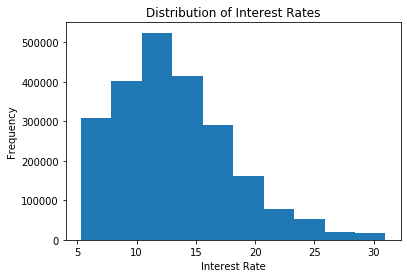

In [13]:
plt.hist(df['int_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates')
plt.show()

##### Loan Period - Term

In [14]:
# Loan period from the dataset:

df.term.unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [15]:
df.term.value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

##### Loan Grade

- Loan grades are assigned by Lending Club based on the borrower’s credit history and the information provided in their loan application. 
- Possible loan grades range from A–G, where:
    - "A" loans are associated with the lowest credit risk
    - "G" loans are associated with the highest credit risk.

##### Loan Sub-Grade

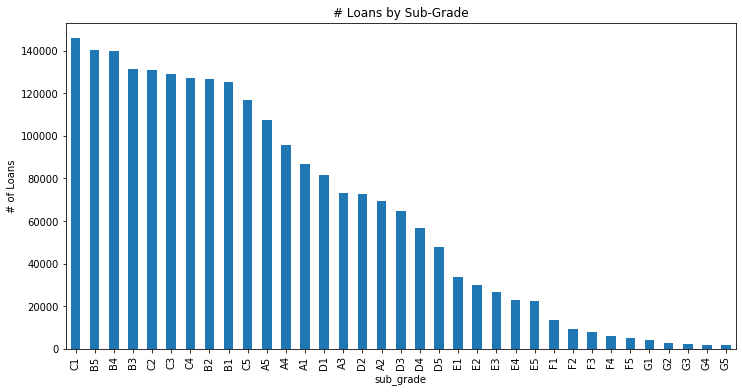

In [16]:
plt.figure(figsize=(12,6))
df.groupby('sub_grade').loan_amnt.count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('# of Loans')
plt.title('# Loans by Sub-Grade')
plt.show()

In [18]:
intrate_grade_grp = df.groupby('grade').int_rate.median().sort_values(ascending = False).reset_index()

In [19]:
intrate_grade_grp

,grade,int_rate
0,G,28.18
1,F,24.89
2,E,21.48
3,D,17.99
4,C,13.99
5,B,10.75
6,A,7.24


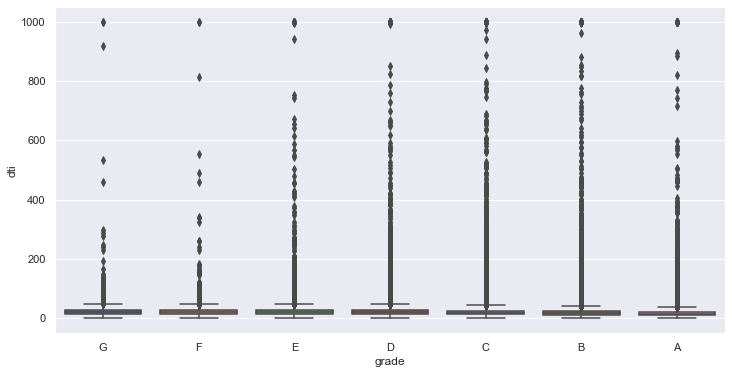

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(x=df['grade'], y=df['dti'], order=intrate_grade_grp['grade'])

---

### step 2: Understanding the basics of key financial terms relevant to this project.

#### What is FICO score? How is it determined?

- The FICO model is used by the vast majority of banks and credit grantors, and is based on consumer credit files of the three national credit bureaus: Experian, Equifax, and TransUnion. 
- Because a consumer's credit file may contain different information at each of the bureaus, FICO scores can vary depending on which bureau provides the information to FICO to generate the score


- **FICO Makeup**
    - Credit scores are designed to measure the risk of default by taking into account various factors in a person's financial history. 
    - Although the exact formulas for calculating credit scores are secret, FICO has disclosed the following components
    
        - **35%: payment history**: This is best described as the presence or lack of derogatory information. Bankruptcy, liens, judgments, settlements, charge offs, repossessions, foreclosures, and late payments can cause a FICO score to drop.

        - **30%: debt burden**: This category considers a number of debt specific measurements. According to FICO there are six different metrics in the debt category including the debt to limit ratio, number of accounts with balances, amount owed across different types of accounts, and the amount paid down on installment loans.
        
        - **15%: length of credit history** aka Time in File: As a credit history ages it can have a positive impact on its FICO score. There are two metrics in this category: 
            - the average age of the accounts on a report, and, 
            - the age of the oldest account.

        - **10%: types of credit used (installment, revolving, consumer finance, mortgage)**: Consumers can benefit by having a history of managing different types of credit.
        
        - **10%: recent searches for credit**: 
            - hard credit inquiries or "hard pulls," which occur when consumers apply for a credit card or loan (revolving or otherwise), can hurt scores, especially if done in great numbers. 
            - Credit inquiries that were made by the consumer (such as pulling a credit report for personal use), by an employer (for employee verification), or by companies initiating pre-screened offers of credit or insurance do not have any impact on a credit score: these are called "soft inquiries" or "soft pulls," and do not appear on a credit report used by lenders, only on personal reports. Soft inquires are not considered by credit scoring systems.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


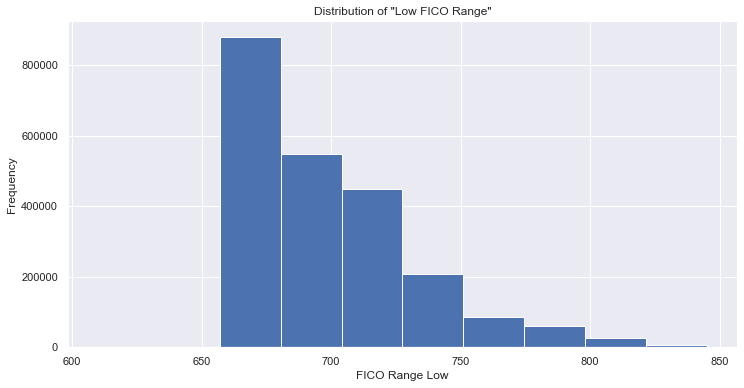

In [21]:
plt.figure(figsize=(12,6))
plt.hist(df['fico_range_low'])
plt.xlabel('FICO Range Low')
plt.ylabel('Frequency')
plt.title('Distribution of "Low FICO Range"')
plt.show()

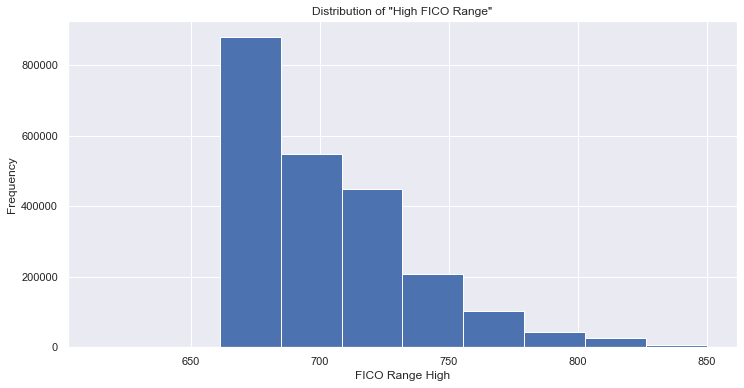

In [22]:
plt.figure(figsize=(12,6))
plt.hist(df['fico_range_high'])
plt.xlabel('FICO Range High')
plt.ylabel('Frequency')
plt.title('Distribution of "High FICO Range"')
plt.show()

---

### What are the differences of installment credit and revolving credit?

- there are two fundamental types of credit repayments:
    - revolving credit
    - installment credit

**Installment Credit**

- Borrowers repay installment credit loans with scheduled, periodic payments
- This type of credit involves the gradual reduction of principal and eventual full repayment, ending the credit cycle
- The **most distinguishing features of an installment credit account** are the predetermined length and end date, often referred to as the term of the loan (**"term"**)
- The loan agreement usually includes an **amortization schedule**, in which the principal is gradually reduced through installment payments over the course of several years.
- **Common installment loans include**: 
    - mortgages
    - auto loans
    - student loans, and 
    - private personal loans. 

    - With each of these, you know how much your monthly payment is and how long you will make payments. An additional credit application is required to borrow more money.

**Revolving Credit**

- revolving credit contracts allow borrowers to use a **line of credit** according to the terms of the contract, which **do not have fixed payments**
- Revolving credit is credit that is renewed as the debt is paid, allowing the borrower access to a line of credit when needed
- **Credit cards** and **lines of credit** are two familiar forms of revolving credit. 
    - Your credit limit does not change when you make payments on your revolving credit account. You can return to your account to borrow more money as often as you want, as long as you do not exceed your maximum.
- Because you are not borrowing a lump sum when the account is opened, **there is no set payment plan with revolving credit**. 
    - You are **granted the ability to borrow up to a certain amount**. 
    - However, this flexibility often results in **lower borrowing amounts and higher interest rates**. 
    - Unsecured revolving credit account interest rates often range between **15%–20%**. 
    - The interest rate is rarely locked in, and creditors have the right to increase your rate if you fail to make payments.

--- 

### Installment and Amortization: 

#### For installment loans, what does 'installment' mean? What is amortization schedule?

**Amortization**:

- In the context of lending, it refers to the paying off of debts in regular installments over a period of time, with each payment going toward covering both principal and interest
- Amortization typically refers to the process of writing down the value of a loan
- Amortization schedules are used by lenders, such as financial institutions, to present a **loan repayment schedule based on a specific maturity date**

- Amortization can refer to the process of **paying off debt over time in regular installments of interest and principal sufficient to repay the loan in full by its maturity date**. 
    - With mortgage and auto loan payments, a higher percentage of the flat monthly payment goes toward interest early in the loan. 
    - With each subsequent payment, a greater percentage of the payment goes toward the loan's principal.
    
- Amortization can be calculated using most modern financial calculators, spreadsheet software packages such as Microsoft Excel, or online amortization charts.

---

### Prepayment Risk: 

- What does it mean? 
- In Lending Club's loan practice, which party bears the prepayment risk? 
- Is there any penalty for prepaying the debt?

- Prepayment by borrowers adjusts the annual interest that investors receive
- Depending on prevailing fed interest rates, the prepayment can be either a loss or gain (essentially, opportunity costs wrt fed interest rates). Loss for investor if a performing loan is prepaid.
- Wrt LC, the investor bears the prepayment risk
- No penalty for prepaying debt

--- 

### Loan Status:
In the Lending Club dataset, a loan is labeled either:
    - 'Fully Paid'
    - 'Current'
    - 'Late'
    - 'Grace period'
    - 'Default'
    - 'Charged Off', etc. 

--- 

#### What does loan settlement mean?

The settlement of a loan is the act of paying back the amount of money owed to the lender.

- settlement date
- loan_status has a value "Fully Paid"

--- 

#### What does loan collection mean?

Delinquencies are a natural component of investing in Notes. When borrowers are delinquent, LendingClub makes significant efforts to contact the delinquent borrowers, collect outstanding payments, and bring the loans back to current status. LendingClub has a robust internal servicing team and works with several external collection agencies on a regular basis. We use a statistical risk model to identify which loans to outsource to external collection agencies with the goal of maximizing the returns to our investors. These third party agencies have extensive experience and sophisticated tools to track borrowers who have changed locations. 
 
Once loans become delinquent, we attempt to contact borrowers via email, phone, and letter to collect any past due payments. We often review recent credit reports to understand the current credit status of the delinquent borrowers. Depending on the circumstances, we may work with the borrowers to arrange for payment to be made immediately, structure a new payment plan, or take other appropriate action, all in an attempt to prevent the loan status from deteriorating further. For example, we waive late payment fees at our discretion when it increases the chance of receiving the loan payment due from a borrower or if the borrower promises to return a delinquent loan to current status and fulfills that promise. As our investor, you are regularly updated with any servicing and collection activity related to your Notes via the loan performance page in your account. To see the loan performance page, go to My Notes and click on the status of a particular Note. 
 
The collections process in general is highly regulated. Our internal servicing team and professional third-party debt collection agencies collect payments from delinquent borrowers in compliance with the extensive consumer protection laws related to servicing and collections activities. Under no circumstances will an investor be permitted to contact borrowers directly. Learn more about the regulatory environment related to servicing and collections. 

In addition to the servicing and collections efforts, LendingClub reports delinquent borrowers to credit bureaus every month. This information can adversely impact credit score and the ability to obtain credit in the future, which can often incentivize borrowers to bring their loans current.
 
Delinquencies are a natural component of investing in Notes, and diversification can help to lower your exposure to any individual loan loss and to reduce the volatility of your portfolio’s returns.

--- 

#### What are the different types of risks in investing in **Lending Club** loans? 

- LC loans are not FDIC guaranteed
- Inflation risk
- LC fee fluctuations
- LC might go bankrupt, though as publicly traded chaces are low
- Prepayment of loans - which is especially bad for investors on performing loans
- Liquidity risk - no access to money until loan is paid in full
- Default cases may rise in the event of a financial crisis
- Debt is unsecured. LC cannot collect against an asset if the borrower defaults.

--- 

**Lending Club Investing Strategy** 

When browsing loans on the Lending Club platform, I recommend focusing on **higher quality borrowers in the A and B grade**. Although you will receive a lower interest payment, the likelihood of getting paid back increases tremendously.

Focus on I **high quality borrowers who are looking to refinance their credit card debt**. Credit card debt often runs in the 15% – 30% range, which is why to such borrowers, paying 6% – 10% is a good deal.

If possible, look for borrowers with a **FICO score of at least 680, a debt-to-income ratio of at least 30%, no delinquency history, and positive reviews. Diversify your loans as much as possible too**I . It’s a lot less risky to have a portfolio of 100 notes versus 10. For example, their team told me with a 100 investment portfolio, you would have still made money during the financial crisis vs. -50% in the S&P 500.

--- 

#### Warm Up question

- Among all the  151  columns of the loan data set, which information is **known at the time of loan issuance?**
- Which columns are related to borrowers's credit history and demographic information?
- Which columns store loan-specific information?

### Question
- How does the issued loans vary year after year?
- What are the purposes of applying **Lending Club** loans?
- Do you observe different loan grade patterns for different loan purposes?
- Do you observe different loan grade patterns in different years?
- How about loan counts stratified into years and loan purposes/loan grades?

##### Loans issued per year

In [23]:
dfd = df.copy()

In [24]:
dfd.head() ## set index as date and then remove NaN and then use .astype(int)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
dfd['issue_date'] = pd.to_datetime(dfd['issue_d'])

In [50]:
dfd.issue_date.dtype

dtype('<M8[ns]')

In [27]:
dfd = dfd.set_index('issue_date')

In [28]:
dfd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
issue_date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
dfd['issue_year'] = dfd.index.year

In [30]:
# dropping rows where issue_d is missing --- 33 rows dropped
dfd = dfd[dfd.index.notnull()]

In [43]:
dfd[['issue_year']].tail()

,issue_year
issue_date,
2016-10-01,2016
2016-10-01,2016
2016-10-01,2016
2016-10-01,2016
2016-10-01,2016


In [42]:
dfd['issue_year']=dfd['issue_year'].astype(int)

In [44]:
dfd.issue_year.value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64

In [46]:
dfd.reset_index()

,issue_date,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year
0,2015-12-01,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
1,2015-12-01,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
2,2015-12-01,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
3,2015-12-01,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
4,2015-12-01,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,2016-10-01,89885898,NaN,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2016
2260664,2016-10-01,88977788,NaN,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2016
2260665,2016-10-01,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2016
2260666,2016-10-01,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,...,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0,2016


In [51]:
dfd.groupby('issue_year').issue_date.count().sort_values(ascending=False)

issue_year
2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_date, dtype: int64

In [ ]:
plt.figure(figsize=(12,6))
dfd.groupby('issue_year').issue_date.count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('# of Loans')
plt.title('# Loans per year')
plt.show()

In [ ]:
dfd[dfd.loan_status != 'Current']

##### Loan Purpose

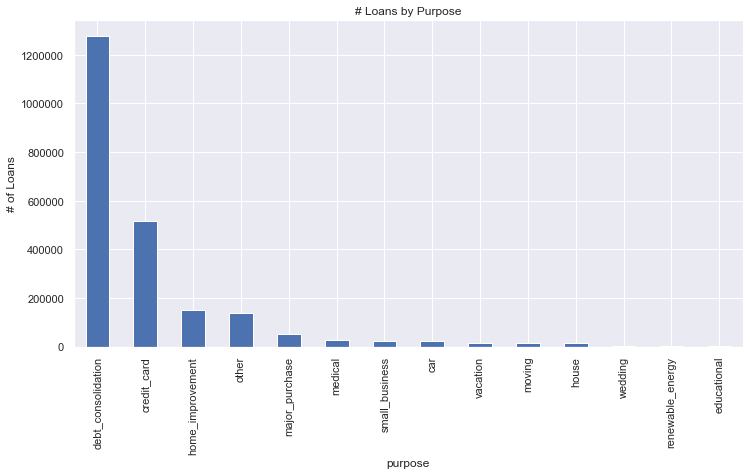

In [52]:
plt.figure(figsize=(12,6))
df.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('# of Loans')
plt.title('# Loans by Purpose')
plt.show()

##### Loan Purpose and Grade

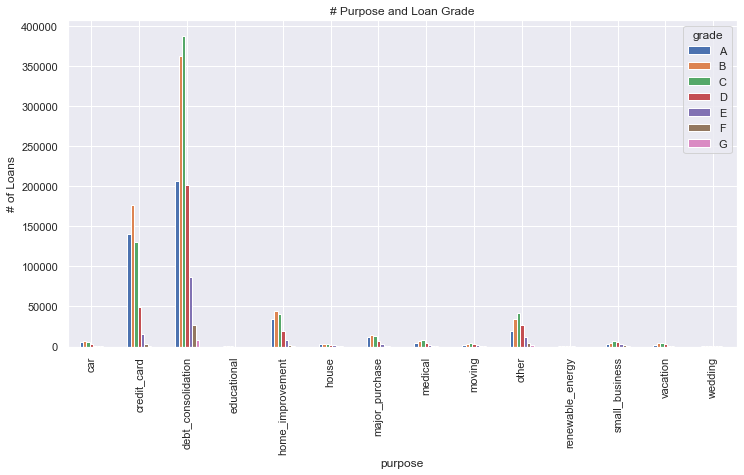

In [53]:
df.groupby(['purpose','grade']).size().unstack().plot(kind='bar')
plt.ylabel('# of Loans')
plt.title('# Purpose and Loan Grade')
plt.show()

##### Loan Grade patterns over the years

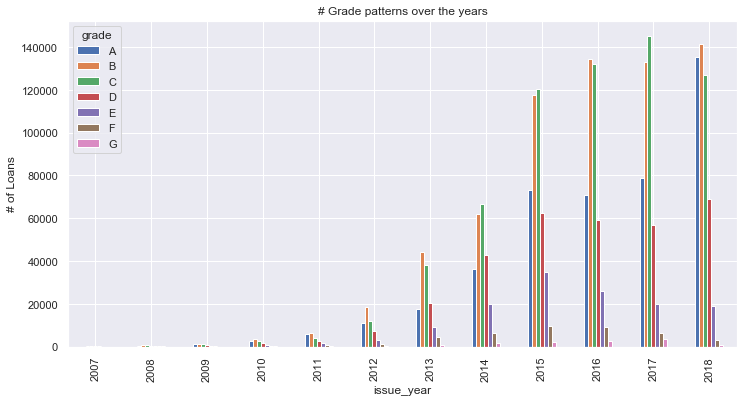

In [54]:
dfd.groupby(['issue_year','grade']).size().unstack().plot(kind='bar')
plt.ylabel('# of Loans')
plt.title('# Grade patterns over the years')
plt.show()

#### Loan counts stratified into years and grade

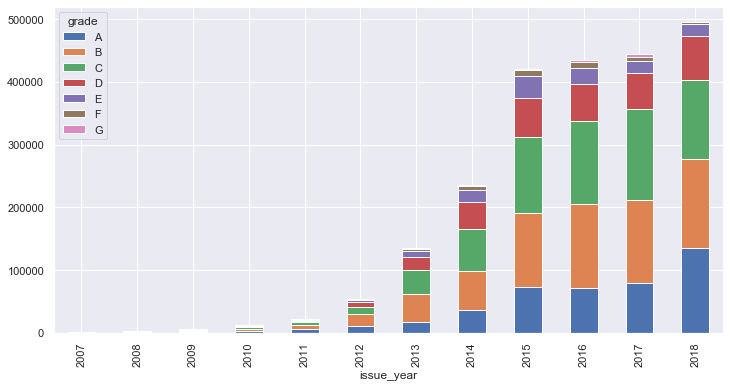

In [55]:
# dfd.groupby(['issue_year','grade']).size().unstack().plot(kind='bar',stacked=False)
dfd.groupby(['issue_year','grade']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

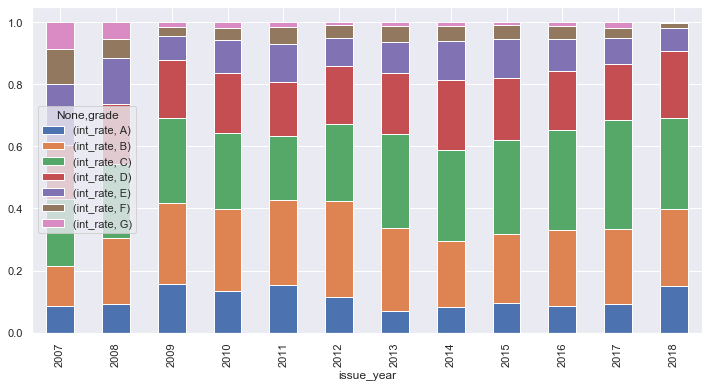

In [56]:
tps = dfd.pivot_table(values=['int_rate'], 
                      index='issue_year',
                      columns='grade',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)

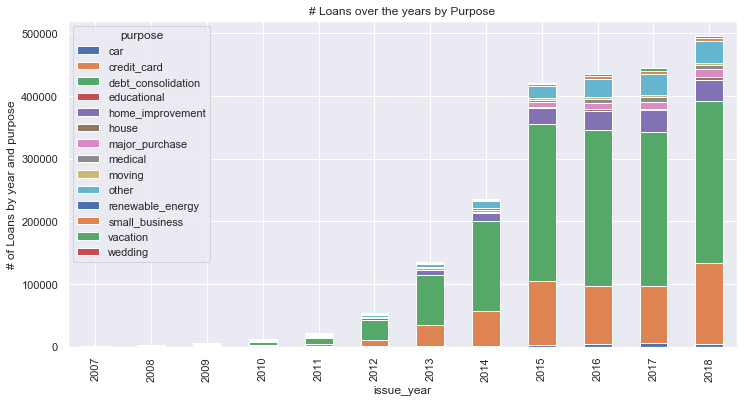

In [57]:
dfd.groupby(['issue_year','purpose']).size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('# of Loans by year and purpose')
plt.title('# Loans over the years by Purpose')
plt.show()

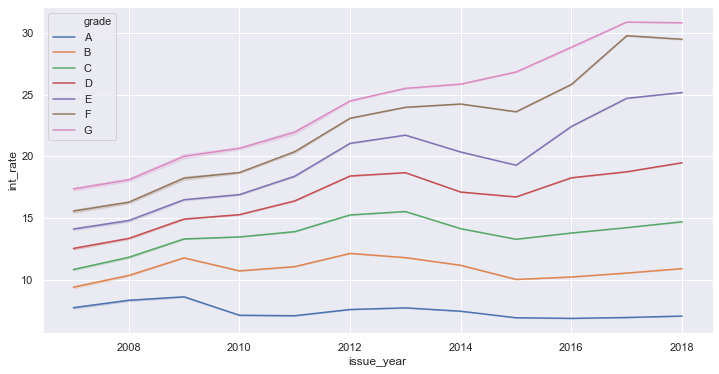

In [58]:
grade_amnt_grp = dfd.groupby(['grade']).mean()[['loan_amnt']].reset_index()
sns.lineplot(x="issue_year", y="int_rate",hue = 'grade',hue_order=grade_amnt_grp['grade'],data=dfd)

---

### Question
- How are the loan amounts/funded amounts distributed?
- Are there variations across different loan purposes, loan grades, etc?
- Are loans with higher funded amounts harder to be paid-in-full?

##### Distribution of Loan Amounts

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


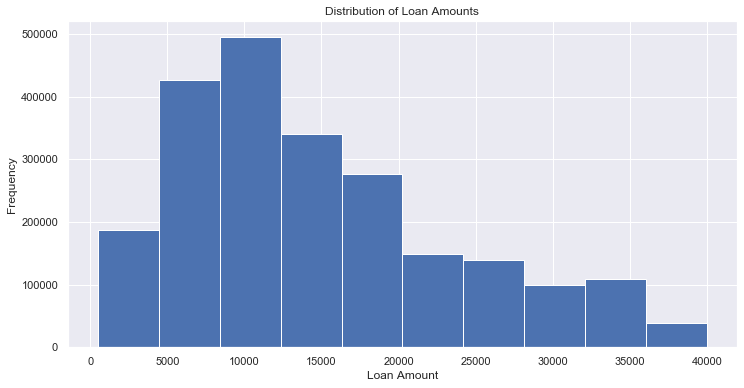

In [59]:
plt.figure(figsize=(12,6))
plt.hist(df['loan_amnt'])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

In [ ]:
sns.distplot(df['loan_amnt'].dropna())

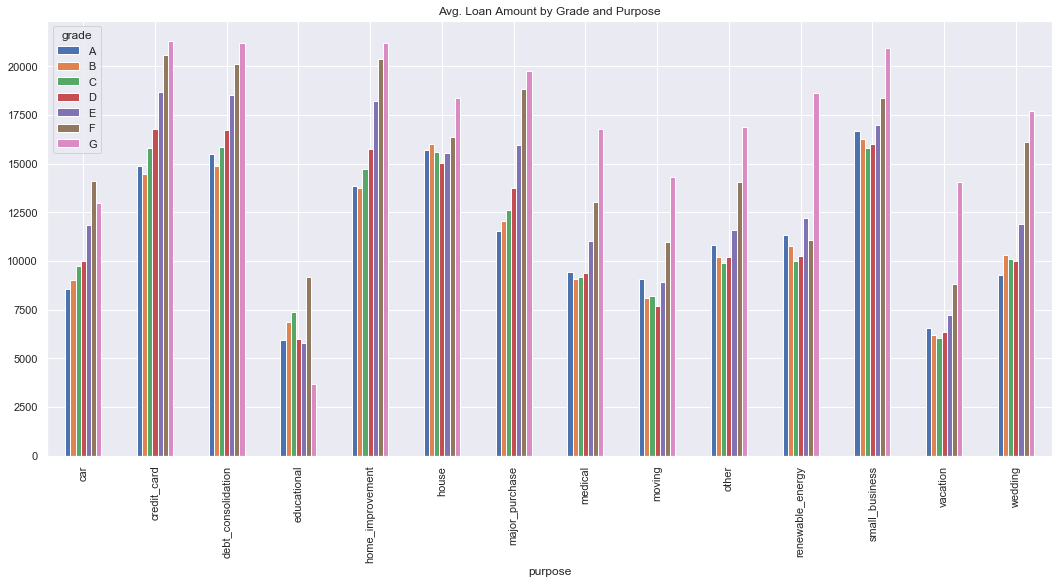

In [60]:
# plt.figure(figsize=(18,12))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,8)

df.groupby(['purpose','grade'])['loan_amnt'].mean().unstack().plot(kind='bar')
plt.title('Avg. Loan Amount by Grade and Purpose')
plt.show()

##### Variations of loan amount by Grade

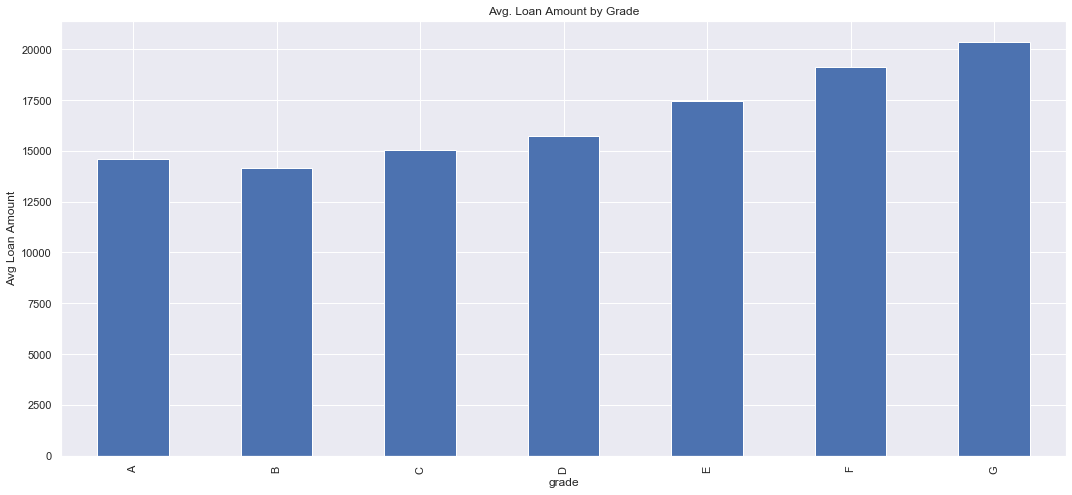

In [61]:
df.groupby('grade').loan_amnt.mean().plot.bar()
plt.ylabel('Avg Loan Amount')
plt.title('Avg. Loan Amount by Grade')
plt.show()

##### Variations of loan amount by Purpose

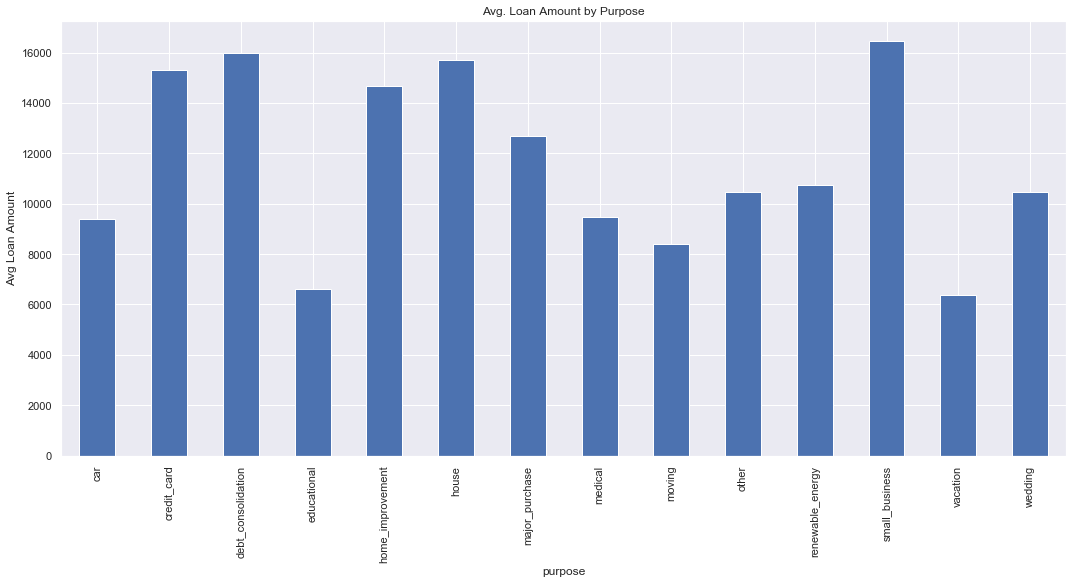

In [62]:
df.groupby('purpose').loan_amnt.mean().plot.bar()
plt.ylabel('Avg Loan Amount')
plt.title('Avg. Loan Amount by Purpose')
plt.show()

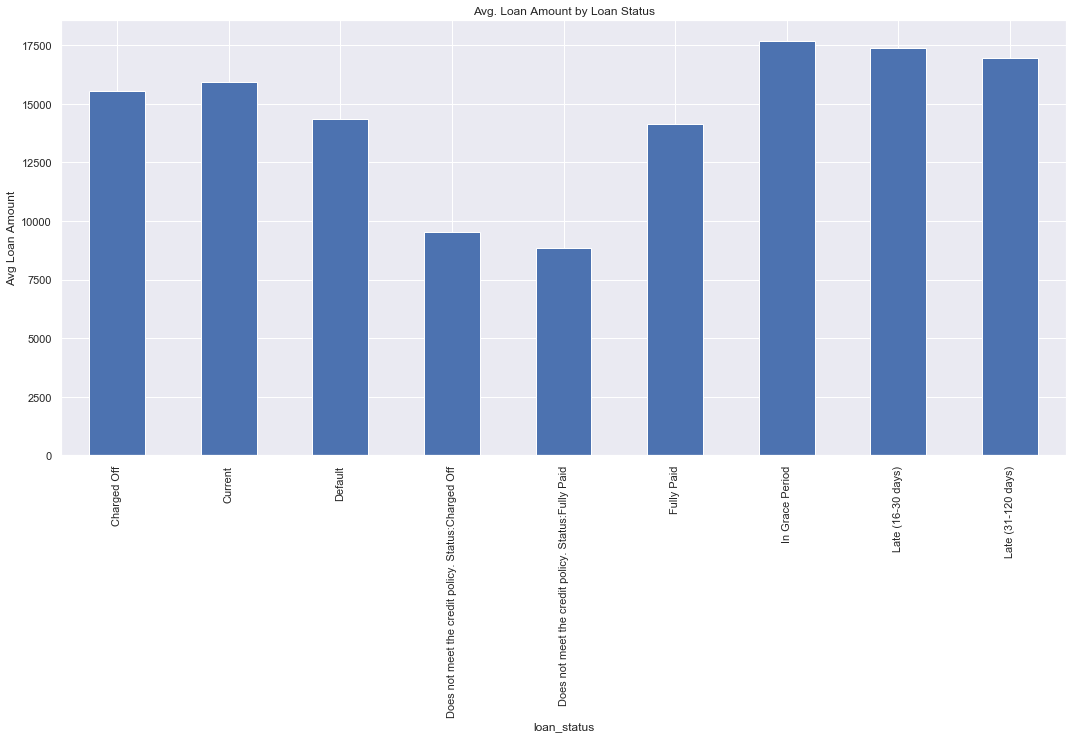

In [63]:
df.groupby('loan_status').loan_amnt.mean().plot.bar()
plt.ylabel('Avg Loan Amount')
plt.title('Avg. Loan Amount by Loan Status')
plt.show()

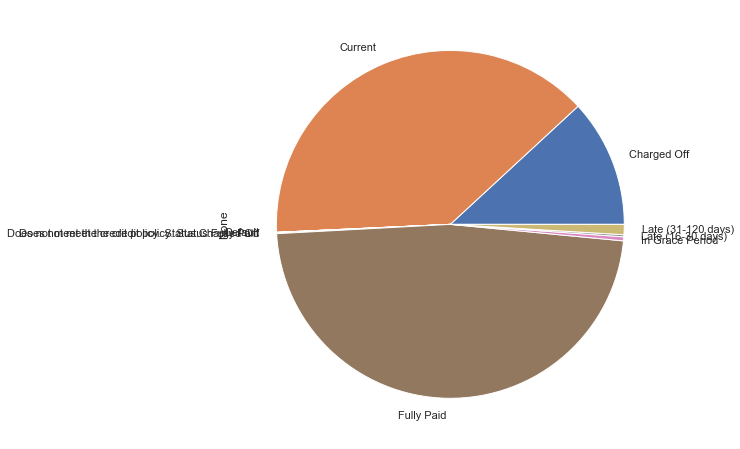

In [64]:
df.groupby('loan_status').size().plot(kind='pie')

In [65]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

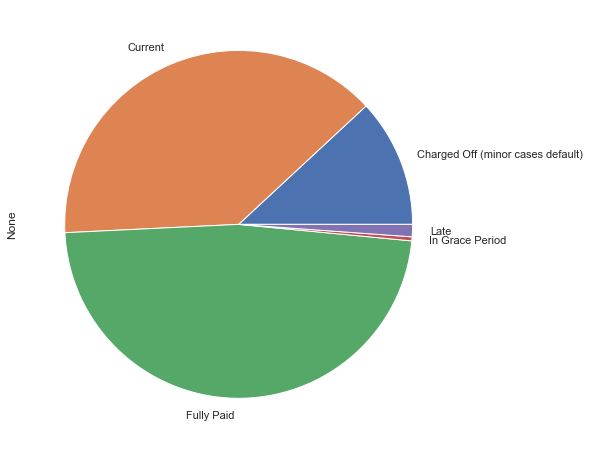

In [66]:
def group_loan_status(loanstatus):
    if loanstatus == 'Fully Paid' or loanstatus == 'Does not meet the credit policy. Status:Fully Paid':
        return 'Fully Paid'
    elif loanstatus == 'Current':
        return 'Current'
    elif loanstatus == 'Charged Off' or loanstatus == 'Default' or loanstatus == 'Does not meet the credit policy. Status:Charged Off':
        return 'Charged Off (minor cases default)'
    elif loanstatus == 'In Grace Period':
        return 'In Grace Period'
    else:
        return 'Late'

df['loan_status_grouped'] = df['loan_status'].apply(group_loan_status)
df.groupby('loan_status_grouped').size().plot(kind='pie')

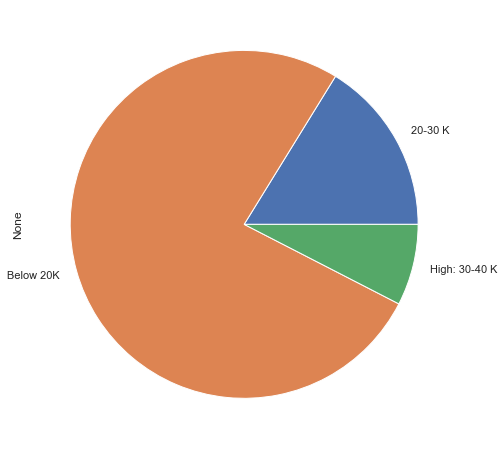

In [67]:
def group_loan_amount(loanamount):
    if loanamount <= 20000 :
        return 'Below 20K'
    elif loanamount <= 30000:
        return '20-30 K '
    else:
        return 'High: 30-40 K'

df['loan_amount_grouped'] = df['loan_amnt'].apply(group_loan_amount)
df.groupby('loan_amount_grouped').size().plot(kind='pie')




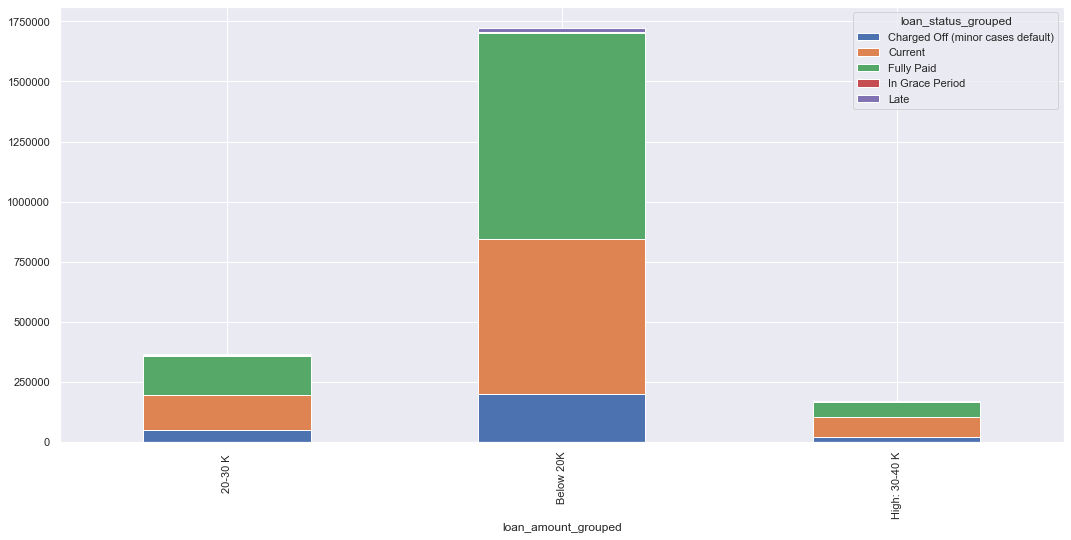

In [68]:
df.groupby(['loan_amount_grouped','loan_status_grouped']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

##### Interest Rate and Loan Grade

In [69]:
intrate_grade_grp = df.groupby('grade').int_rate.median().sort_values(ascending = False).reset_index()

In [70]:
intrate_grade_grp

,grade,int_rate
0,G,28.18
1,F,24.89
2,E,21.48
3,D,17.99
4,C,13.99
5,B,10.75
6,A,7.24


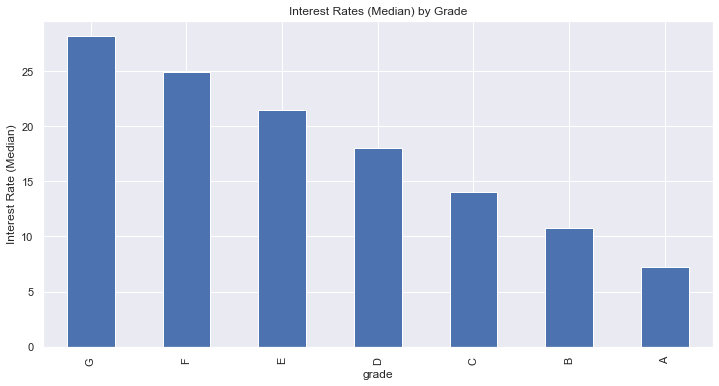

In [71]:
plt.figure(figsize=(12,6))
df.groupby('grade').int_rate.median().sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Interest Rate (Median)')
plt.title('Interest Rates (Median) by Grade')
plt.show()

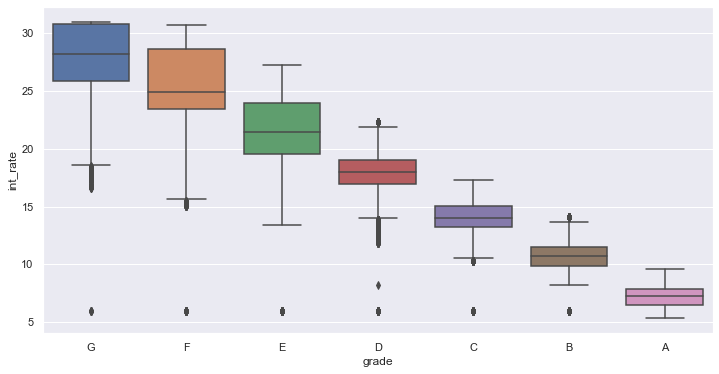

In [72]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(x=df['grade'], y=df['int_rate'], order=intrate_grade_grp['grade'])


In [73]:
intrate_subgrade_grp = df.groupby('sub_grade').int_rate.median().sort_values(ascending = False).reset_index()

In [132]:
# intrate_subgrade_grp

##### Interest Rate and Loan SubGrade

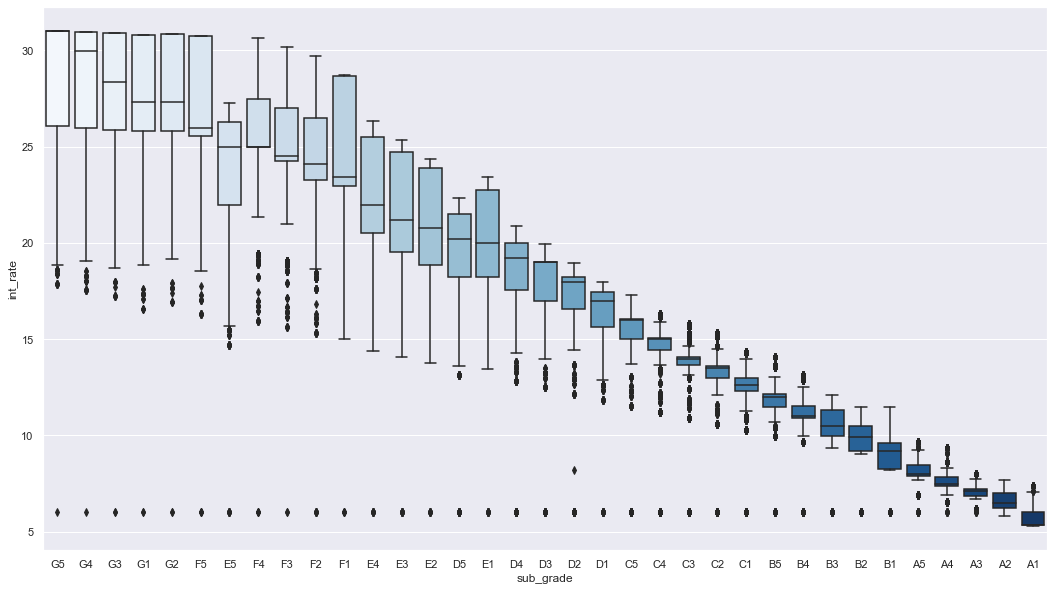

In [75]:
sns.set(rc={'figure.figsize':(18,10)})
sns.boxplot(x=df['sub_grade'], y=df['int_rate'], palette='Blues', order=intrate_subgrade_grp['sub_grade'])


---

### Question:
- For borrowers, the most important factor is **interest rate** charged.
- Provide insights on the **interest rates** dependence on loan grade/subgrade and term (36 or 60 months).
- If the analysis is refined by separating loans with different start months 
(the year-month loan issuance date), report your finding.
- Any rational explanation on why the **interest rate** should be grade/sub-grade 
dependent?
- Any rational explanation on the time series variations of interest rates?
- Any rational explanation why the interest rate rise w.r.t. loan term?

---

**Provide insights on the interest rates dependence on loan grade/subgrade and term (36 or 60 months).**

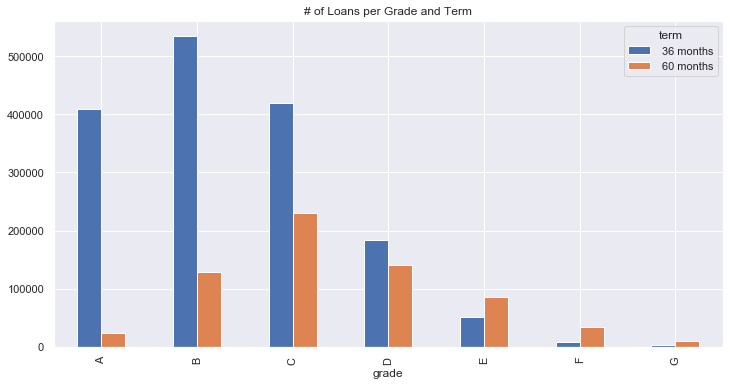

In [152]:
plt.rcParams["figure.figsize"] = (12,6)
df.groupby(['grade','term']).size().unstack().plot(kind='bar')
plt.title('# of Loans per Grade and Term')
plt.show()

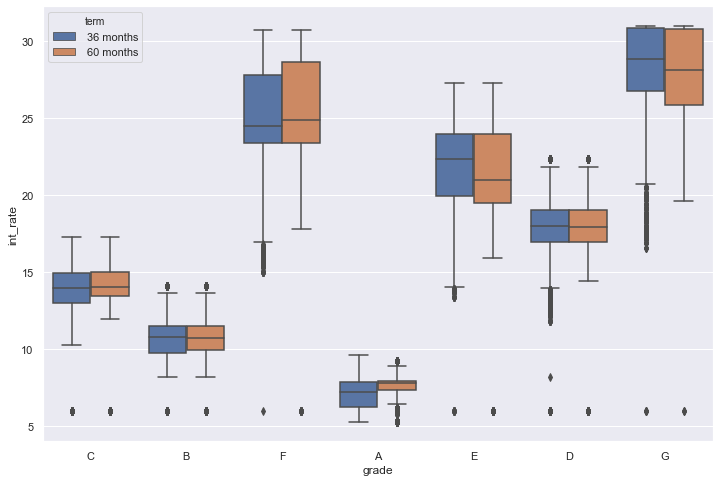

In [157]:
plt.rcParams["figure.figsize"] = (12,8)
sns.boxplot(x='grade', y='int_rate', data=dfd, hue='term')
plt.show()

In [158]:
# dfd.groupby(['grade','term']).int_rate.mean()

In [159]:
# dfd.groupby(['grade','term']).size()

---

**If the analysis is refined by separating loans with different start months (the year-month loan issuance date), report your finding.**

In [ ]:
dfd['issue_month'] = pd.DatetimeIndex(dfd['issue_date']).month

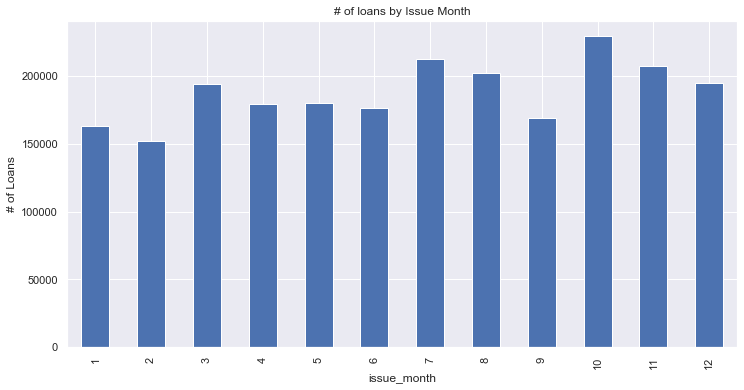

In [163]:
plt.figure(figsize=(12,6))
# dfd.groupby('issue_month').int_rate.median().sort_values(ascending = False).plot(kind='bar')
dfd.groupby('issue_month').size().plot(kind='bar')
plt.ylabel('# of Loans')
plt.title('# of loans by Issue Month')
plt.show()

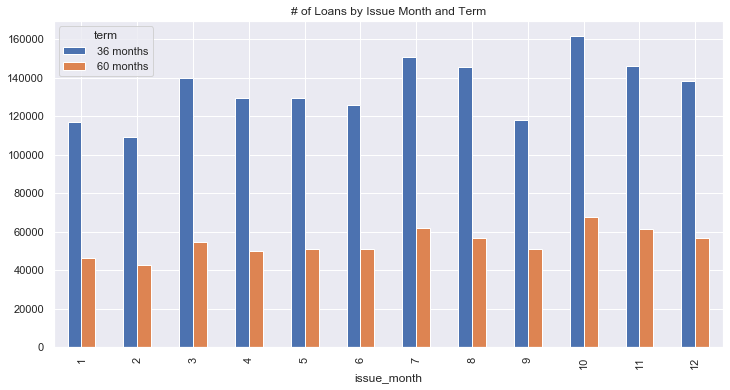

In [169]:
plt.rcParams["figure.figsize"] = (12,6)
dfd.groupby(['issue_month','term']).size().unstack().plot(kind='bar')
plt.title('# of Loans by Issue Month and Term')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
dfd.groupby(['issue_month','term']).size().unstack().plot(kind='bar')
plt.title('# of Loans by Issue Month and Term')
plt.show()

---

##### Recovery term

In [82]:
# Recovery term
dfd[dfd.loan_status == 'Charged Off'][['sub_grade','loan_status','issue_date','issue_year','last_pymnt_d']]

,sub_grade,loan_status,issue_date,issue_year,last_pymnt_d
issue_date,,,,,
2015-12-01,E2,Charged Off,2015-12-01,2015,May-2017
2015-12-01,C5,Charged Off,2015-12-01,2015,Apr-2017
2015-12-01,C2,Charged Off,2015-12-01,2015,Nov-2018
2015-12-01,F3,Charged Off,2015-12-01,2015,Jul-2016
2015-12-01,C4,Charged Off,2015-12-01,2015,Feb-2018
...,...,...,...,...,...
2016-10-01,C3,Charged Off,2016-10-01,2016,Dec-2016
2016-10-01,C2,Charged Off,2016-10-01,2016,Oct-2018
2016-10-01,C4,Charged Off,2016-10-01,2016,Jan-2017


In [87]:
dfd['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [91]:
268559/dfd.shape[0]     # 12% of the entire loans are Charged-Off

0.11879630268575483

In [90]:
dfd.shape[0]

2260668

In [98]:
co = dfd[dfd['loan_status'] == 'Charged Off']

In [100]:
co[~co['settlement_term'].isnull()][['settlement_term']].shape

(33271, 1)

In [101]:
33271/268559    # 12% of the Charged-Off Loan status's have a settlement agreement in place.

0.12388711605271095

In [102]:
33271/dfd.shape[0]   # 1.4% of the entire data set have settlement term.

0.014717331337463085

--- 

##### Avg Duration to last payment by Sub Grade

In [122]:
dfd['last_payment_date'] = pd.to_datetime(dfd['last_pymnt_d'])

In [104]:
dfd.last_payment_date.dtype

dtype('<M8[ns]')

In [110]:
# Difference between last payment date and issue date in months
dfd['months_to_last_payment'] = (dfd['last_payment_date'] - dfd['issue_date']) / np.timedelta64(1,'M')

In [118]:
dur_df = dfd[(dfd['loan_status'] == 'Fully Paid') | (dfd['loan_status'] == 'Charged Off')]


In [119]:
dur_df['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

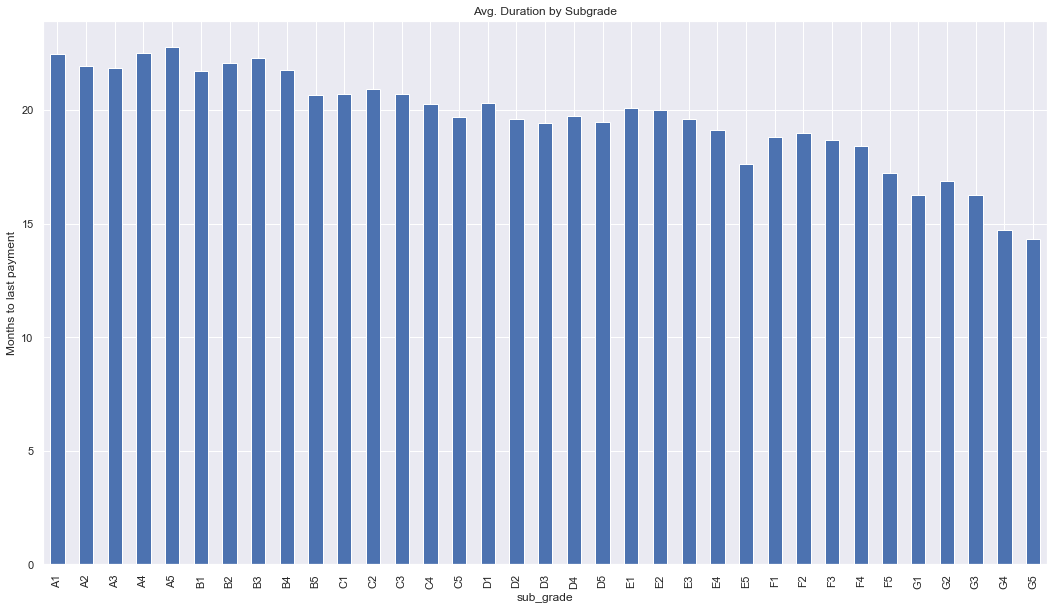

In [121]:
dur_df.groupby('sub_grade').months_to_last_payment.mean().plot.bar()
plt.ylabel('Months to last payment')
plt.title('Avg. Duration by Subgrade')
plt.show()


# dur_df.groupby('sub_grade').months_to_last_payment.mean().sort_values(ascending = False).plot.bar()

--- 

--- 

--- 

#####  Misrepresentation - therefore drop

In [ ]:
df.pymnt_plan.value_counts()

In [ ]:
df.pymnt_plan.describe()

In [ ]:
pd.DataFrame(df.pymnt_plan.describe())

In [ ]:
df.hardship_flag.value_counts()

In [ ]:
df.disbursement_method.value_counts()

--- 

## Rough

---

In [ ]:
# round((((ir/100)/12)*PV)/((1-(1+((ir/100)/12))**(-term))),2)

---

--- 

---

---

--- 